# Resample an Imbalanced Dataset
Resampling is an important technique when you have a classification problem with an imbalance in classes. An imbalanced dataset can cause machine learning models to perform poorly and overpredict the majority class. In some settings, this type of bias can result in major costs (such as fraud detection and medical diagnosis). Balancing a dataset can be a way to avoid the issues that arise from a class imbalance and ensure that your classification model performs well.

You can use this template to resample a dataset of your own based on your needs.

The cell below imports the necessary libraries for this template, configures visualization settings, and defines a function to help interpret the outcomes of different resampling methods.

In [1]:
pip install imblearn

     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Data manipulation and visualization imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set plotting size and style
sns.set(rc = {'figure.figsize':(15, 8)})
sns.set_style("darkgrid")

# Preprocessing imports
from sklearn.model_selection import train_test_split

# Create a function to plot resampled data
def plot_resample(X, y, X_res, y_res, method):    
    # Create subplots
    fig, axes = plt.subplot_mosaic([['a', 'b'], ['c', 'd']])
    # Generate scatterplots of first two features for inspection
    sns.scatterplot(x=X.iloc[y.values == 0, 0], y=X.iloc[y.values == 0, 1], alpha=0.10, ax=axes['a'])
    sns.scatterplot(x=X.iloc[y.values == 1, 0], y=X.iloc[y.values == 1, 1], alpha=0.10, ax=axes['a'])
    sns.scatterplot(x=X_res.iloc[y_res.values == 0, 0], y=X_res.iloc[y_res.values == 0, 1], alpha=0.10, ax=axes['b'])
    sns.scatterplot(x=X_res.iloc[y_res.values == 1, 0], y=X_res.iloc[y_res.values == 1, 1], alpha=0.10, ax=axes['b'])
    sns.countplot(y=y, ax=axes['c'])
    sns.countplot(y=y_res, ax=axes['d'])
    # Set titles and show plot
    plt.suptitle(method + ' Outcomes')
    axes['a'].title.set_text('Original Data')
    axes['b'].title.set_text(method + ' Data')
    axes['c'].title.set_text('Original Class Proportions')
    axes['d'].title.set_text(method + ' Class Proportions')
    plt.tight_layout()
    plt.show()

## Load in your data
The cell below is used to import the data. The example dataset used here is for fraud data where there is a large imbalance between fraudulent and non-fraudulent cases.

👇&nbsp;&nbsp;_To use your own data, you will need to:_
- _Upload a file and update the path provided to `pd.read_csv()`._
- _Alternatively, if you have data in a database, you can add a SQL cell and connect to a custom integration._
- _Your data will need to contain numeric data for the target and feature variables. It will also need to already be pre-processed (i.e., clean and with pre-processing steps already completed)._

In [3]:
# Import the data (add your own file here)
df = pd.read_csv("data/fraud.csv")

# Preview the data
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,street,city,state,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-02-27 03:18:34,3562679455732797,"fraud_Graham, Hegmann and Hammes",food_dining,35.00,Amanda,Jones,7320 Jennifer Forges,Queenstown,MD,...,39.0026,-76.1424,3862,Maintenance engineer,1962-12-06,30935b60a9be1f672d26010e62937d69,1330312714,38.955526,-76.692640,0
1,2019-08-05 22:14:33,3575789281659026,fraud_Kassulke PLC,shopping_net,6.59,Lindsay,Wilson,7618 Gonzales Mission,Centerview,MO,...,38.7897,-93.8702,2368,Electronics engineer,1989-07-17,a521beb7e5b8ac5df4d85d385e2dc665,1344204873,38.503613,-93.998752,0
2,2020-02-10 09:32:39,4294930380592,fraud_Stracke-Lemke,grocery_pos,144.96,Misty,Rivera,1980 Vasquez Manors Apt. 574,Catawba,VA,...,37.3696,-80.1284,1363,Equality and diversity officer,1940-08-23,f6c12c2f7a869a7ae91bd71925463496,1360488759,36.487760,-80.613435,0
3,2019-05-01 17:58:57,213148039875802,fraud_Dooley Inc,shopping_pos,40.39,Jill,Jacobs,034 Kimberly Mountains,Brandon,FL,...,27.9551,-82.2966,79613,Environmental consultant,1978-11-30,7c46c68c414929a4a71e5c85846912e0,1335895137,28.560941,-81.570976,0
4,2020-05-19 22:01:33,30074693890476,fraud_Gerhold LLC,home,58.26,Kelsey,Richards,889 Sarah Station Suite 624,Holcomb,KS,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,92f7ee41c4ab289f4e12147206179692,1369000893,37.846821,-101.439485,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129663,2019-03-18 00:21:09,376012912828093,fraud_Friesen Inc,shopping_pos,2.51,Nathan,Mayer,478 Donovan Corners Apt. 803,Schaumburg,IL,...,42.0144,-88.0935,92294,Claims inspector/assessor,1969-05-01,474d2b31b2975c2b9428565d9c714d90,1332030069,41.420775,-88.127962,0
129664,2020-01-24 21:23:01,2305336922781618,fraud_Kertzmann LLC,health_fitness,12.39,Jeffrey,Rice,21447 Powell Circle,Moulton,IA,...,40.6866,-92.6833,1132,Probation officer,1961-02-14,1c95b5610ba5878ea2eae7192b54419d,1359062581,41.502486,-91.992397,0
129665,2020-05-26 12:32:47,4683638447911,"fraud_Hettinger, McCullough and Fay",home,73.15,Daniel,Boyd,8925 Nicholas Points,Egan,LA,...,30.2510,-92.5002,1261,Broadcast presenter,1972-07-01,8b2787c2b9f0fa5f597f9588e85a011a,1369571567,29.451443,-92.507154,0
129666,2020-01-26 00:46:40,3540075240003197,fraud_Nader-Heller,misc_net,8.37,Christian,Johns,892 Solis Neck,Lonsdale,MN,...,44.4477,-93.4252,5211,Chief Strategy Officer,1987-01-27,3988aa87e0fdb525b137990aadd5908a,1359161200,44.869696,-94.101923,0


## How imbalanced is my data?
The first step is to prepare the data and investigate the extent of the imbalance. This includes splitting your data into training and testing subsets and then visualizing the imbalance in your target variable.

👇&nbsp;&nbsp;_In this cell, you will need to:_
- _Set the name of the target variable._
- _Define which variables are your features._

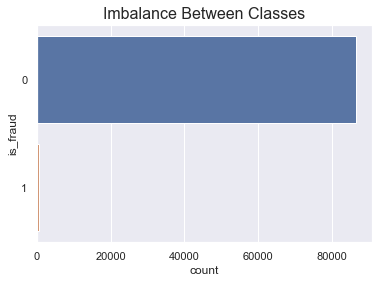

In [4]:
# Set target and feature variables (add your own here)
target = "is_fraud"
features = ["lat", "long", "amt", "city_pop", "merch_lat", "merch_long"]

# Separate the target from the features
y = df[target]
X = df[features]

# Split the data into train and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Plot the counts of the 
sns.countplot(y=y_train) 
plt.title("Imbalance Between Classes", size=16)
plt.show()

Based on the size and type of your data, you will next want to choose a method to correct the imbalance between classes. You can navigate to the following sections to find the code to:
- Perform [random under-sampling](#rus) to reduce the quantity of the majority class.
- Perform [random over-sampling](#ros) to increase the quantity of the minority class.
- Perform [SMOTE](#smote) over-sampling to increase the quantity of the minority class.

<a id='rus'></a>
## Randomly sampling our majority class to match the size of the minority
Random under-sampling is a technique that performs random draws from the majority class to match the minority class. As a result, you risk throwing away a lot of data. You will probably only want to use random under-sampling when:
- You have a lot of data that you can afford to discard.
- You are aiming for computational efficiency.
The following code uses [RandomUnderSampler()](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html) to under-sample the majority class to match the minority class.

💡&nbsp;&nbsp;_For `RandomUnderSampler()`, and the other sampling classes introduced in this template, there is an optional `sampling_strategy` parameter. Passing a float between 0 and 1 as an argument will adjust the ratio of samples in the minority class._

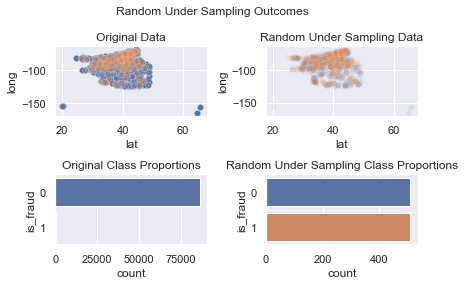

In [5]:
# Import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

# Resample the data
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

# View the resampled labels
plot_resample(X_train, y_train, X_res, y_res, "Random Under Sampling")

💡&nbsp;&nbsp;_Points in the upper plots are slightly transparent, which means that highly opaque points indicate a greater concentration of values. Notice how there is greater transparency in the random undersampled data, indicating fewer data points (confirmed by the lower right barplot) and a greater balance of the green and markers, indicating an equal quantity between classes._

<a id='ros'></a>
## Randomly sampling to increase the size of our minority class
If you wish to avoid the loss of data that comes with random under-sampling, you can choose to use random over-sampling. This technique performs random draws with replacement on the minority class to match the majority class. This is a simple technique but has the drawback that your model will be trained on a large number of duplicates which may harm model performance by introducing issues such as overfitting.

The following code uses [RandomOverSampler()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) to over-sample the minority class to match the majority class.

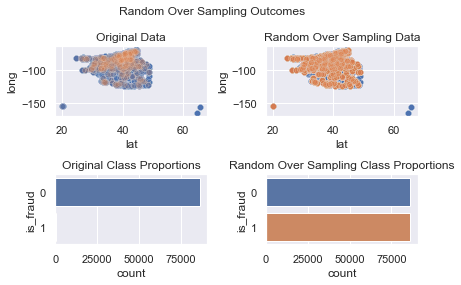

In [6]:
# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Resample the data
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

# View the resampled labels
plot_resample(X_train, y_train, X_res, y_res, "Random Over Sampling")

💡&nbsp;&nbsp;_Notice here that unlike the random under sampling, there is a similar level of opacity between the two plots. This indicates that the quantity of data was preserved after resampling. There is also now a similar quantity of orange and blue points, indicating an equality between the two classes (confirmed by the lower right bar plot)._

<a id='smote'></a>
## Creating synthetic samples to rebalance our data
The final technique this template will cover is SMOTE or Synthetic Minority Over-sampling Technique. SMOTE functions works like random over-sampling, but instead of exact duplicates, it creates new synthetic observations. Although this reduces the risk of overfitting, it can have some potential downsides:
- SMOTE does not work as well with high-dimensional data.
- SMOTE can introduce noise into the data because of how it generates synthetic examples.

The following code uses [SMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) to use examples from the minority class to generate new synthetic data points to match the majority class.

💡&nbsp;&nbsp;_If your dataset contains categorical features, such as one-hot encoded variables, you will need to use [SMOTENC](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html) instead of SMOTE. Visit the documentation to learn more._

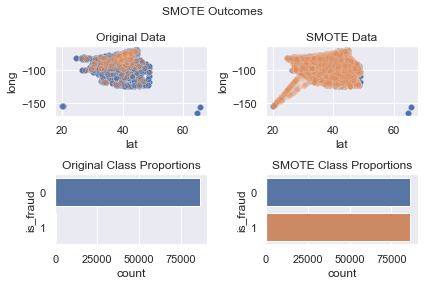

In [7]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

# Resample the data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# View the resampled labels
plot_resample(X_train, y_train, X_res, y_res, "SMOTE")

💡&nbsp;&nbsp;_You may notice two features of the plot above:_
- _Lines of points in the plot of the SMOTE data. This is caused by the way in which the new samples are generated through interpolation. You can read more about how SMOTE works [here](https://imbalanced-learn.org/stable/over_sampling.html#smote-adasyn)._
- _An abundance of the minority class. This is because in the example data there are many duplicate values. Via interpolation, the minority class will have fewer duplicates, and will therefore cover more of the plot._

## Further reading
There are a number of ways to proceed, including:
- Applied use cases where you might encounter class imbalances, such as fraud detection. DataCamp's [Fraud Detection in Python](https://app.datacamp.com/learn/courses/fraud-detection-in-python) covers this topic in greater depth.
- More advanced forms of sampling methods, including combinations such as [SMOTEEN](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html#imblearn.combine.SMOTEENN) and [SMOTETomek](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html#imblearn.combine.SMOTETomek).
- With a balanced dataset, you may want to check out [workspace templates](https://app.datacamp.com/workspace/templates?selectedLabels=%5B%22classification%22%5D) focused on classification problems.